In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv("Customer Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# GETTING DATA INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# REPLACING BLANKS WITH O AS TENURE IS 0 AND NO CHARGES RECORDED
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")

# CHANGING DATA TYPE OBJECT TO FLOAT
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [6]:
# GETTING UPDATED DAT INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# CHECKS NULL VALUES
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# RETRIVING STATISTICS ANALYSIS
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# RETRIVING SUM OF PARTICULAR COLUMN
df["TotalCharges"].sum()

16056168.7

In [10]:
# RETRIVING SUM 
df.sum()

customerID          7590-VHVEG5575-GNVDE3668-QPYBK7795-CFOCW9237-H...
gender              FemaleMaleMaleMaleFemaleFemaleMaleFemaleFemale...
SeniorCitizen                                                    1142
Partner             YesNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoYesNo...
Dependents          NoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoYesYesNo...
tenure                                                         227990
PhoneService        NoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesY...
MultipleLines       No phone serviceNoNoNo phone serviceNoYesYesNo...
InternetService     DSLDSLDSLDSLFiber opticFiber opticFiber opticD...
OnlineSecurity      NoYesYesYesNoNoNoYesNoYesYesNo internet servic...
OnlineBackup        YesNoYesNoNoNoYesNoNoYesNoNo internet serviceN...
DeviceProtection    NoYesNoYesNoYesNoNoYesNoNoNo internet serviceY...
TechSupport         NoNoNoYesNoNoNoNoYesNoNoNo internet serviceNoN...
StreamingTV         NoNoNoNoNoYesYesNoYesNoNoNo internet serviceYe...
StreamingMovies     

In [11]:
# RETRIVING DUPLICATE VALUES
df["customerID"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: customerID, Length: 7043, dtype: bool

In [12]:
# CONVERTING VALUES INTO ANOTHER VALUES
def conv(value):

    if value==1:
        return"Yes"
    else:
        return"No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [117]:
# GETTING DATA
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


C:\Users\Sagar Joshi\AppData\Local\Temp\ipykernel_19496\3299501778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(x="Churn",data=df,palette='Set2',edgecolor="k")


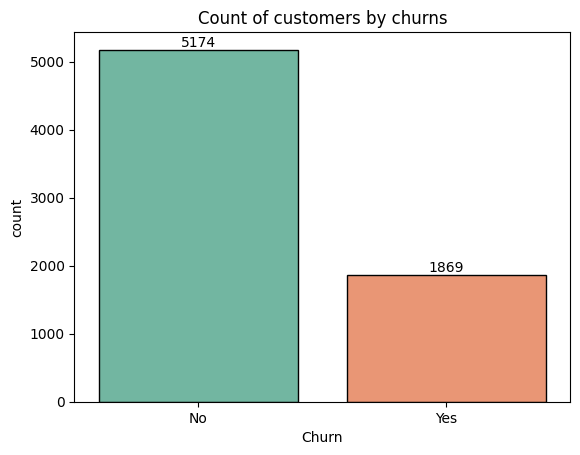

In [46]:
# COUNT OF CUSTOMERS BY CHURNS
a=sns.countplot(x="Churn",data=df,palette='Set2',edgecolor="k")
for container in a.containers:
    a.bar_label(container)
plt.title("Count of customers by churns") 
plt.show()

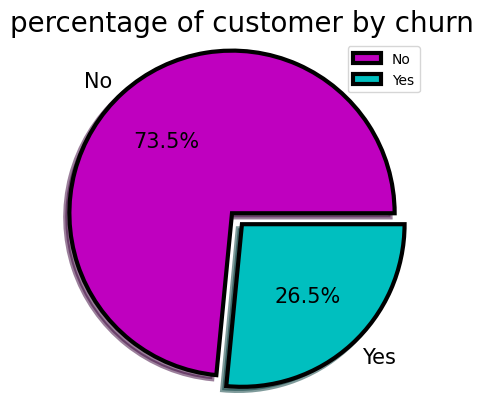

In [119]:
# PERCENTAGE OF CUSTOMER BY CHURN
b= df.groupby("Churn").agg({"Churn":"count"})
ex=[0.1,0]
c=["m","c"]
plt.pie(b["Churn"],labels=b.index, autopct="%0.1f%%",explode=ex,shadow=True,radius=1.1,
        textprops={'fontsize':15},colors=c,wedgeprops={'edgecolor': 'k','linewidth':3})
plt.title("percentage of customer by churn",fontsize=20)
plt.legend(loc=1)
plt.show()

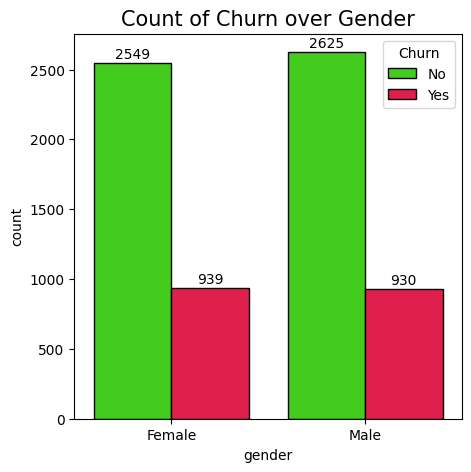

In [71]:
# COUNT OF CHURN BY GENDER
plt.figure(figsize=(5, 5))
b=sns.countplot(df,x="gender",hue="Churn",palette='prism',edgecolor="k")
for container in b.containers:
    b.bar_label(container, fmt='%d', padding=1)
plt.title("Count of Churn over Gender",fontsize=15)
plt.show()

C:\Users\Sagar Joshi\AppData\Local\Temp\ipykernel_19496\647545826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c=sns.countplot(df,x="SeniorCitizen",palette="pastel",edgecolor="k")


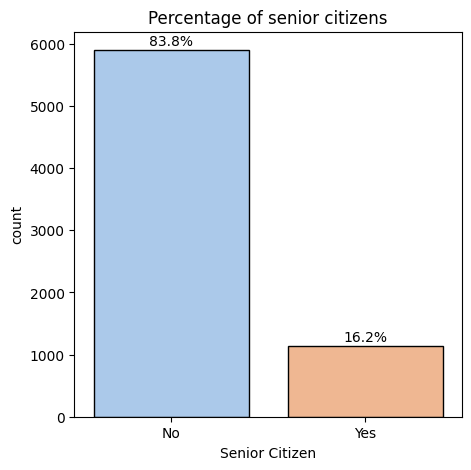

In [89]:
# PERCENTAGE OF CUSTOMER BY SENIOR CITIZEN
plt.figure(figsize=(5,5))
c=sns.countplot(df,x="SeniorCitizen",palette="pastel",edgecolor="k")
plt.xlabel("Senior Citizen")
total = len(df)
for container in c.containers:
    c.bar_label(container, fmt=lambda x: f"{(x/total)*100:.1f}%", padding=1)
plt.title("Percentage of senior citizens")
plt.show()

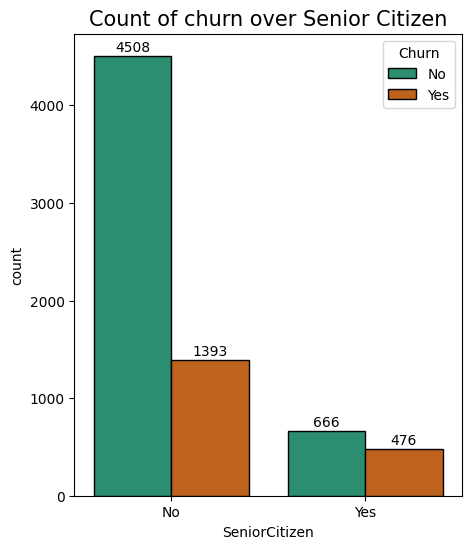

In [77]:
# COUNT OF CHURN BY SENIOR CITIZEN
plt.figure(figsize=(5,6))
a=sns.countplot(df,x="SeniorCitizen",hue="Churn",palette="Dark2",edgecolor="k")
for container in a.containers:
    a.bar_label(container,fmt="%d",padding=1)
plt.title("Count of churn over Senior Citizen", fontsize=15)
plt.show()

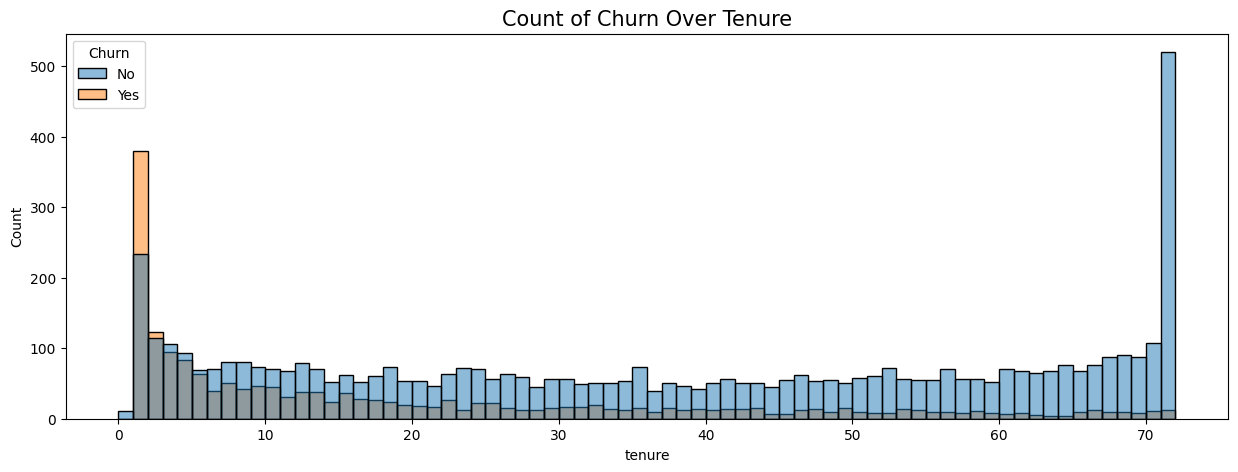

In [98]:
# COUNT OF CHURN BY TENURE
plt.figure(figsize=(15,5))
sns.histplot(df,x="tenure",hue="Churn",bins=72)
plt.title("Count of Churn Over Tenure",size=15)
plt.show()

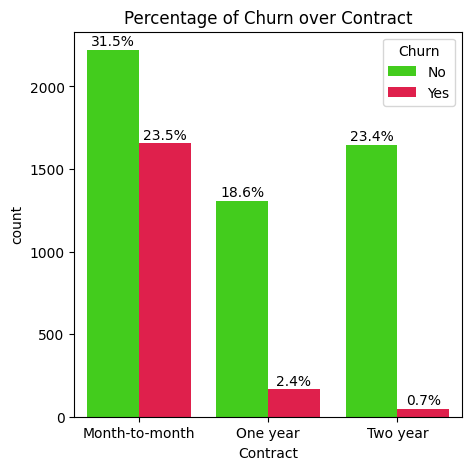

In [106]:
# PERCENTAGE OF CHURN BY TENURE
plt.figure(figsize=(5,5))
a=sns.countplot(df,x='Contract',palette="prism",hue="Churn")
total = len(df)
for container in a.containers:
    a.bar_label(container, fmt=lambda x: f"{(x/total)*100:.1f}%", padding=1)
plt.title("Percentage of Churn over Contract")
plt.show()

In [107]:
# RETRIVING COLUMN NAMES
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

C:\Users\Sagar Joshi\AppData\Local\Temp\ipykernel_19496\4122712889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="prism", edgecolor="k", ax=axes[i])  # Countplot
C:\Users\Sagar Joshi\AppData\Local\Temp\ipykernel_19496\4122712889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="prism", edgecolor="k", ax=axes[i])  # Countplot
C:\Users\Sagar Joshi\AppData\Local\Temp\ipykernel_19496\4122712889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="prism", ed

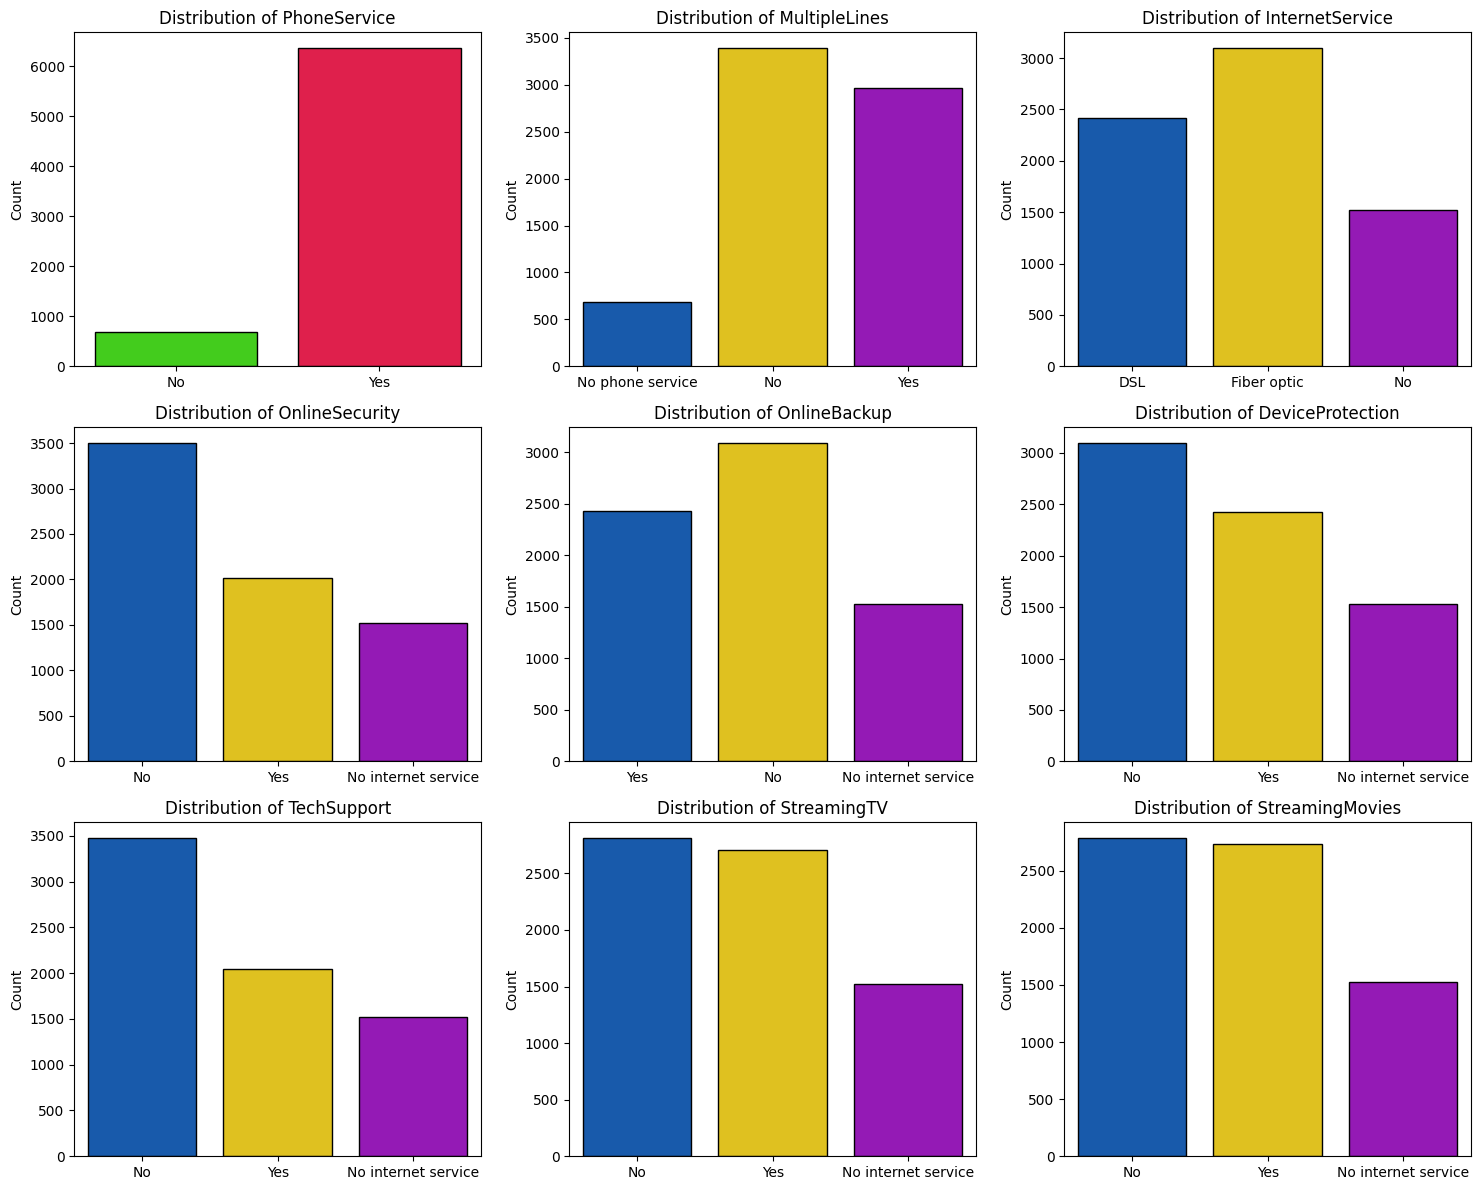

In [120]:
# PLOTING MUPLTIPLE GRAPH BY COUNT OF CUSTOMER ON VARIOUS PARAMETERS
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']


fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 


axes = axes.flatten()


for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, palette="prism", edgecolor="k", ax=axes[i])  
    axes[i].set_title(f"Distribution of {col}", fontsize=12)  
    axes[i].set_xlabel("")  
    axes[i].set_ylabel("Count")  


plt.tight_layout()
plt.show()


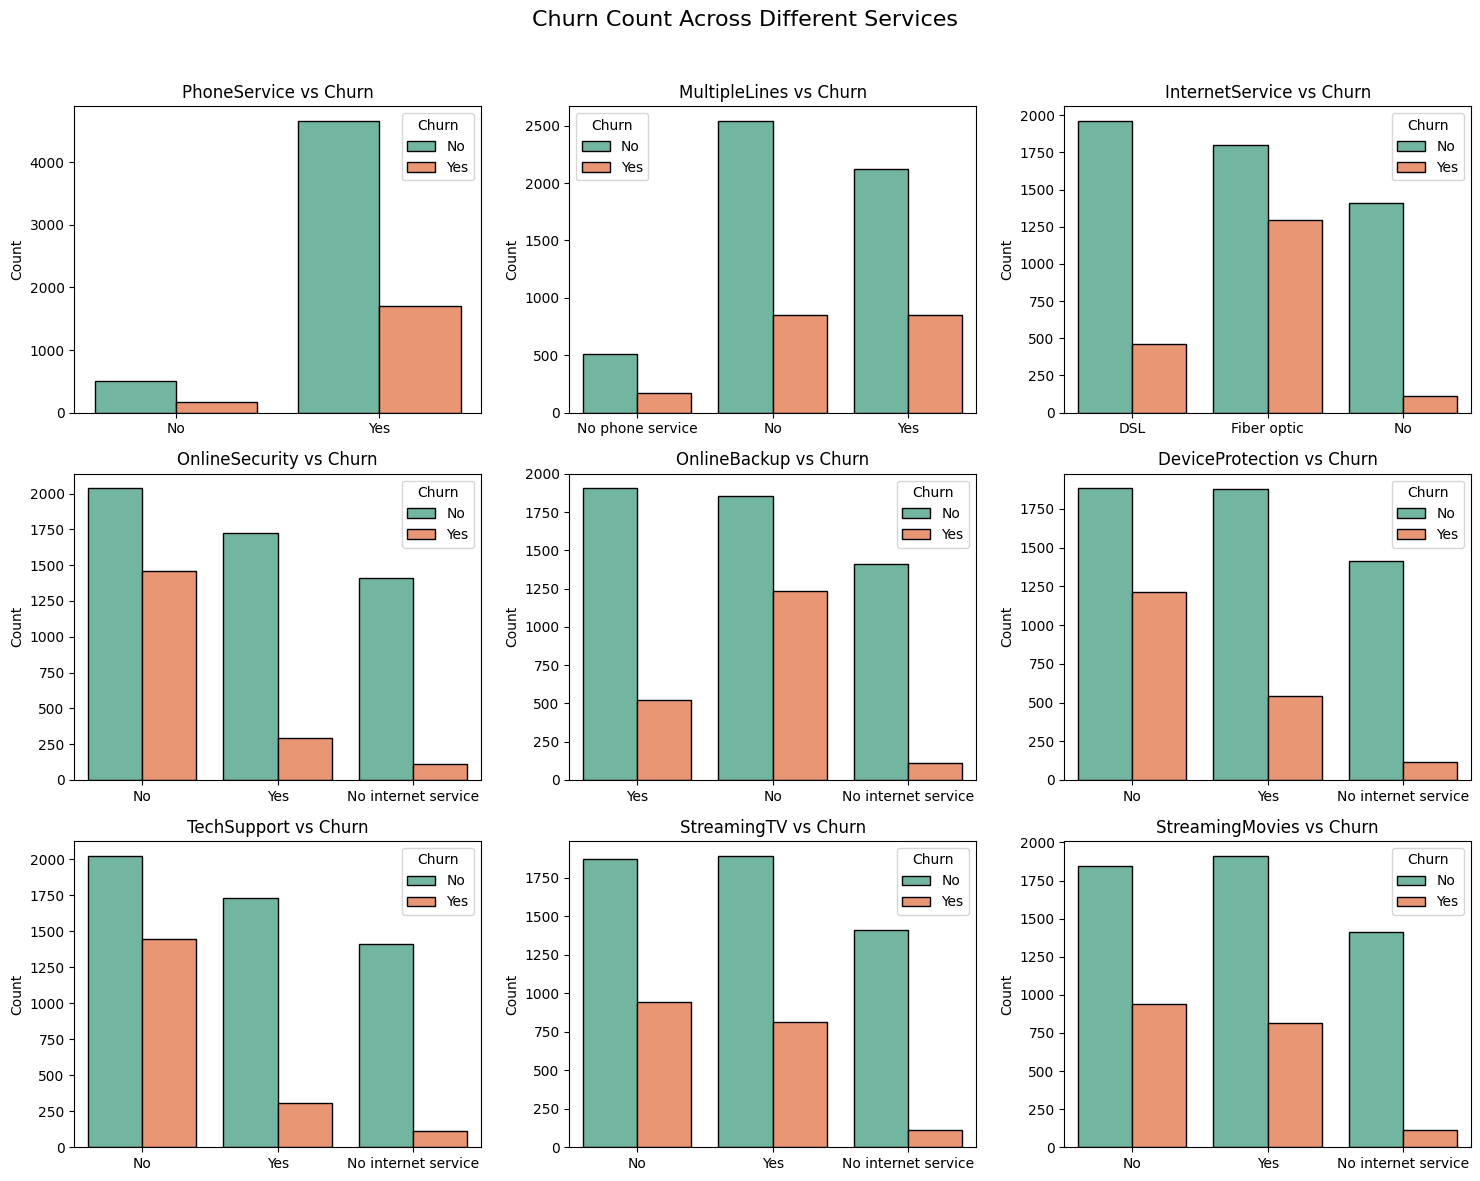

In [111]:
# PLOTING MULTIPLE GRAPH BY CHURN AND COUNT OF CUSTOMER ON VARIOUS PARAMETER
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  
fig.suptitle("Churn Count Across Different Services", fontsize=16)

for col, ax in zip(columns, axes.flatten()):
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2", ax=ax, edgecolor="k")
    ax.set_title(f"{col} vs Churn")
    ax.set_xlabel("") 
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

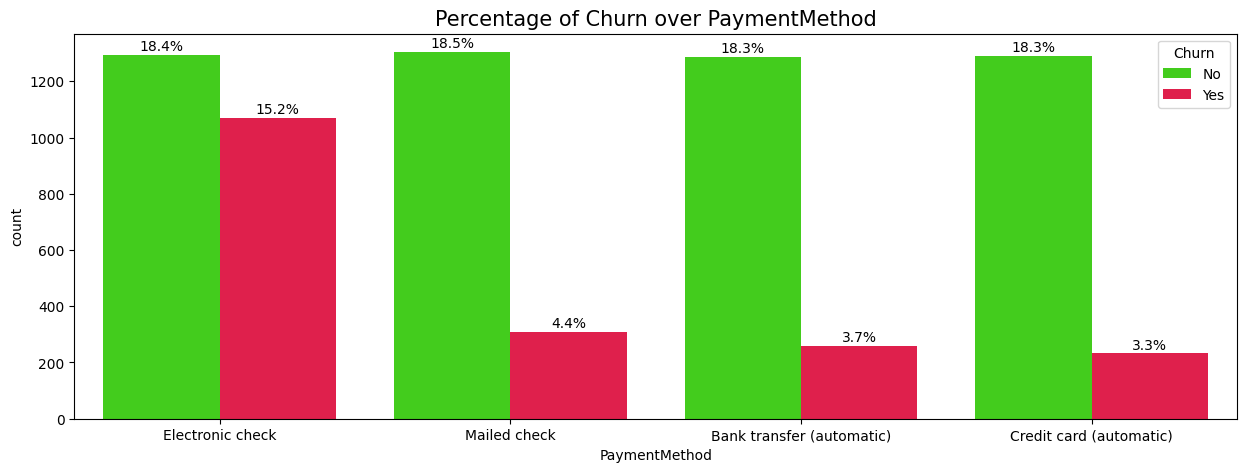

In [115]:
# PERCENTAGE OF CHURN BY PAYMENT METHOD
plt.figure(figsize=(15,5))
a=sns.countplot(df,x='PaymentMethod',palette="prism",hue="Churn")
total = len(df)
for container in a.containers:
    a.bar_label(container, fmt=lambda x: f"{(x/total)*100:.1f}%", padding=1)
plt.title("Percentage of Churn over PaymentMethod",size=15)
plt.show()